In [5]:
import datetime as dt
from dateutil.relativedelta import relativedelta
from pandas.tseries.offsets import BDay #use last BD to bypass feed issues on hols and early mrng
#import datetime as dt#  --->NameError: name 'datetime' is not defined
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DownloadData_v2

import os
import importlib.machinery
import sys

cwd = os.getcwd()

#sys.path #returns all working directories 
print(cwd)
sys.path

C:\Users\miste


['C:\\Users\\miste',
 'C:\\Users\\miste\\anaconda3\\python37.zip',
 'C:\\Users\\miste\\anaconda3\\DLLs',
 'C:\\Users\\miste\\anaconda3\\lib',
 'C:\\Users\\miste\\anaconda3',
 '',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\miste\\.ipython']

#IF BLPAPI WORKS

In [3]:
def get_time_series(start, end, freq, securities):
    
    #create objects 
    securities_obj = []
    i = 0
    for i in range(len(securities)):
        securities_obj.append('') #initialize
        securities_obj[i] = DownloadData_v2.DownloadData(pair = securities[i], \
                                                 fields = ['PX_LAST'], \
                                                 startDate = start, \
                                                 endDate = end, \
                                                 period = frequency, \
                                                source = 'blp')
        
    #create dictionary to store the time series, keys being BBG tickers
    container = {}
    i = 0
    
    #returns dictionary of dateframe_timeseries
    for pair in securities_obj:

        container[pair] = []
    
        container[pair] = securities_obj[i].get_data_blp_historical()
        i += 1
    
    #merge the dataframes_timeseries
    container = pd.concat([container[j] for j in securities_obj], join = 'outer',\
                           axis = 1, keys = securities)
    
    #make numeric
    container = container.apply(pd.to_numeric, errors = 'coerce', axis = 0)
    #ffill 
    container = container.fillna(method = 'ffill')
    
    return container


SARS  = dt.datetime(2003,3,1) #or 2002Nov16  #year, month, day
taper_tantrum  = dt.datetime(2013,5,3)  #year, month, day  
trump_tariff2 = dt.datetime(2019,7,31) #year, month, day  

start = taper_tantrum#dt.datetime(2019, 7, 31)  
end = start + BDay(60) #dt.datetime.today() 

frequency = 'DAILY'

asia_ccys = ['USGG10YR Index', 'SPX Index', 'EURUSD Curncy',\
             'USDCNY Curncy', 'IHN+1M Curncy', 'IRN+1M Curncy', 'KWN+1M Curncy', \
             'PPN+1M Curncy', 'PPSWN3 Curncy',\
             'USDSGD Curncy', 'NTN+1M Curncy']

df_period = get_time_series(start = start, end = end, freq = frequency, securities = asia_ccys)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

https://en.wikipedia.org/wiki/2002%E2%80%932004_SARS_outbreak

On 16 November 2002,[9] an outbreak of severe acute respiratory syndrome (SARS) began in China's Guangdong province, bordering Hong Kong. The first case of infection was traced to Foshan.[10][11] This first outbreak affected people in the food industry, such as farmers, market vendors, and chefs.[12][13] The outbreak spread to healthcare workers after people sought medical treatment for the disease.[13] The People's Republic of China notified the World Health Organization (WHO) about this outbreak on 10 February 2003, reporting 305 cases including 105 health-care workers and five deaths



https://en.wikipedia.org/wiki/Quantitative_easing

On 19 June 2013, Ben Bernanke announced a "tapering" of some of the Fed's QE policies contingent upon continued positive 
economic data. Specifically, he said that the Fed could scale back its bond purchases from $85 billion to $65 billion a
month during the upcoming September 2013 policy meeting.[43][44]
He also suggested that the bond-buying program could wrap up by mid-2014.[45] 
While Bernanke did not announce an interest rate hike, he suggested that if inflation followed a 2% target rate 
and unemployment decreased to 6.5%, the Fed would likely start raising rates. 
The stock markets dropped by approximately 4.3% over the three trading days following Bernanke's announcement, 
with the Dow Jones dropping 659 points between 19 and 24 June, closing at 14,660 
at the end of the day on 24 June.[46] 

On 18 September 2013, the Fed decided to hold off on scaling back its bond-buying program,[47]
and announced in December 2013 that it would begin to taper its purchases in January 2014.[48] 
Purchases were halted on 29 October 2014[49] after accumulating $4.5 trillion in assets.[50]



In [60]:
df_period.columns

MultiIndex([('USGG10YR Index', 'PX_LAST'),
            (     'SPX Index', 'PX_LAST'),
            ( 'EURUSD Curncy', 'PX_LAST'),
            ( 'USDCNY Curncy', 'PX_LAST'),
            ( 'IHN+1M Curncy', 'PX_LAST'),
            ( 'IRN+1M Curncy', 'PX_LAST'),
            ( 'KWN+1M Curncy', 'PX_LAST'),
            ( 'PPN+1M Curncy', 'PX_LAST'),
            ( 'PPSWN3 Curncy', 'PX_LAST'),
            ( 'USDSGD Curncy', 'PX_LAST'),
            ( 'NTN+1M Curncy', 'PX_LAST')],
           )

In [65]:
cols = df_period.columns
#print(cols)
for col in cols:
    if 'USGG' or 'SWN' in col[0]:
        print(col, 'im here')
        df_period[col[0]+'_levelchange'] = df_period[col] - df_period[col].shift(1)
    else:
        df_period[col[0]+'_%change'] = df_period[col].pct_change()
    
df_period.head()


('USGG10YR Index', 'PX_LAST') im here
('SPX Index', 'PX_LAST') im here
('EURUSD Curncy', 'PX_LAST') im here
('USDCNY Curncy', 'PX_LAST') im here
('IHN+1M Curncy', 'PX_LAST') im here
('IRN+1M Curncy', 'PX_LAST') im here
('KWN+1M Curncy', 'PX_LAST') im here
('PPN+1M Curncy', 'PX_LAST') im here
('PPSWN3 Curncy', 'PX_LAST') im here
('USDSGD Curncy', 'PX_LAST') im here
('NTN+1M Curncy', 'PX_LAST') im here
('USGG10YR Index_levelchange', '') im here
('SPX Index_levelchange', '') im here
('EURUSD Curncy_levelchange', '') im here
('USDCNY Curncy_levelchange', '') im here
('IHN+1M Curncy_levelchange', '') im here
('IRN+1M Curncy_levelchange', '') im here
('KWN+1M Curncy_levelchange', '') im here
('PPN+1M Curncy_levelchange', '') im here
('PPSWN3 Curncy_levelchange', '') im here
('USDSGD Curncy_levelchange', '') im here
('NTN+1M Curncy_levelchange', '') im here


,USGG10YR Index,SPX Index,EURUSD Curncy,USDCNY Curncy,IHN+1M Curncy,IRN+1M Curncy,KWN+1M Curncy,PPN+1M Curncy,PPSWN3 Curncy,USDSGD Curncy,...,SPX Index_levelchange_levelchange,EURUSD Curncy_levelchange_levelchange,USDCNY Curncy_levelchange_levelchange,IHN+1M Curncy_levelchange_levelchange,IRN+1M Curncy_levelchange_levelchange,KWN+1M Curncy_levelchange_levelchange,PPN+1M Curncy_levelchange_levelchange,PPSWN3 Curncy_levelchange_levelchange,USDSGD Curncy_levelchange_levelchange,NTN+1M Curncy_levelchange_levelchange
,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,PX_LAST,...,,,,,,,,,,
date,,,,,,,,,,,,,,,,,,,,,
2013-05-03,1.7382,1614.42,1.3114,6.1562,9786.0,53.93,1098.50,40.88,1.15,1.2340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-06,1.7588,1617.50,1.3076,6.1666,9778.0,54.35,1097.05,40.85,1.15,1.2311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,1.7778,1625.96,1.3080,6.1537,9761.0,54.21,1088.90,40.80,1.05,1.2320,...,5.38,0.0042,-0.0233,-9.0,-0.56,-6.70,-2.000000e-02,-0.1,0.0038,-0.045
2013-05-08,1.7665,1632.69,1.3153,6.1413,9733.0,54.19,1085.00,40.75,1.05,1.2274,...,-1.73,0.0069,0.0005,-11.0,0.12,4.25,7.105427e-15,0.1,-0.0055,-0.160
2013-05-09,1.8109,1626.67,1.3043,6.1309,9744.0,54.79,1098.00,40.89,1.05,1.2336,...,-12.75,-0.0183,0.0020,39.0,0.62,16.90,1.900000e-01,0.0,0.0108,0.355


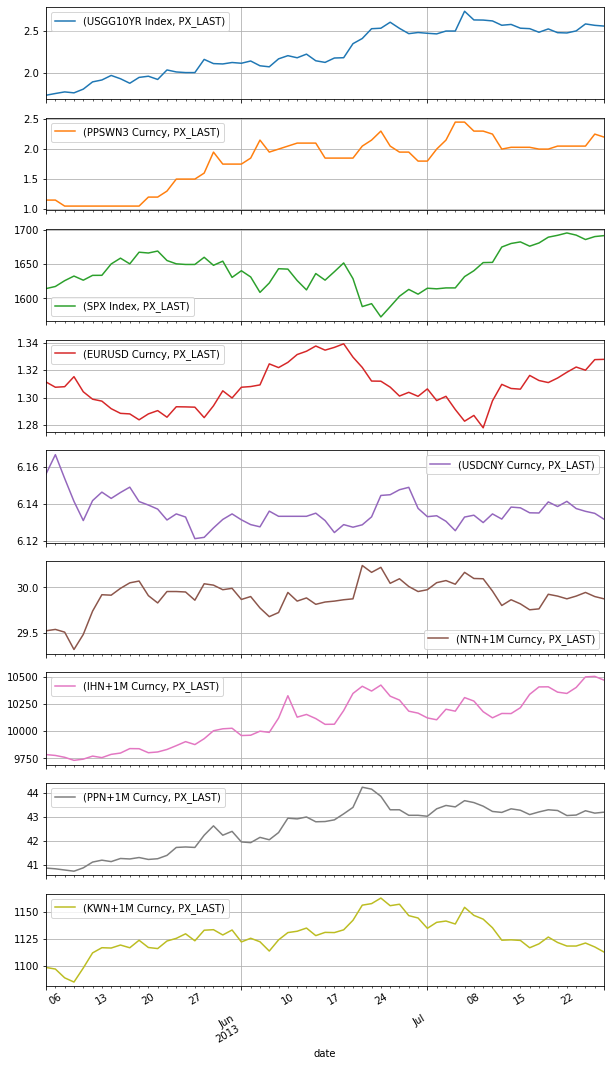

In [45]:
graphs_prices =  df_period[['USGG10YR Index', 'PPSWN3 Curncy', 'SPX Index','EURUSD Curncy', \
         'USDCNY Curncy','NTN+1M Curncy', 'IHN+1M Curncy','PPN+1M Curncy',\
         'KWN+1M Curncy']].plot(subplots =  True, grid = True, figsize =(10,20))#style = 'b',


C:\Users\cp85vc\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-46-f275f69c9c0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ret.iloc[0,:] = 0.0
<ipython-input-46-f275f69c9c0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ret[col[0]+'_cum']=df_ret[col].c

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000189839917F0>,
      dtype=object)

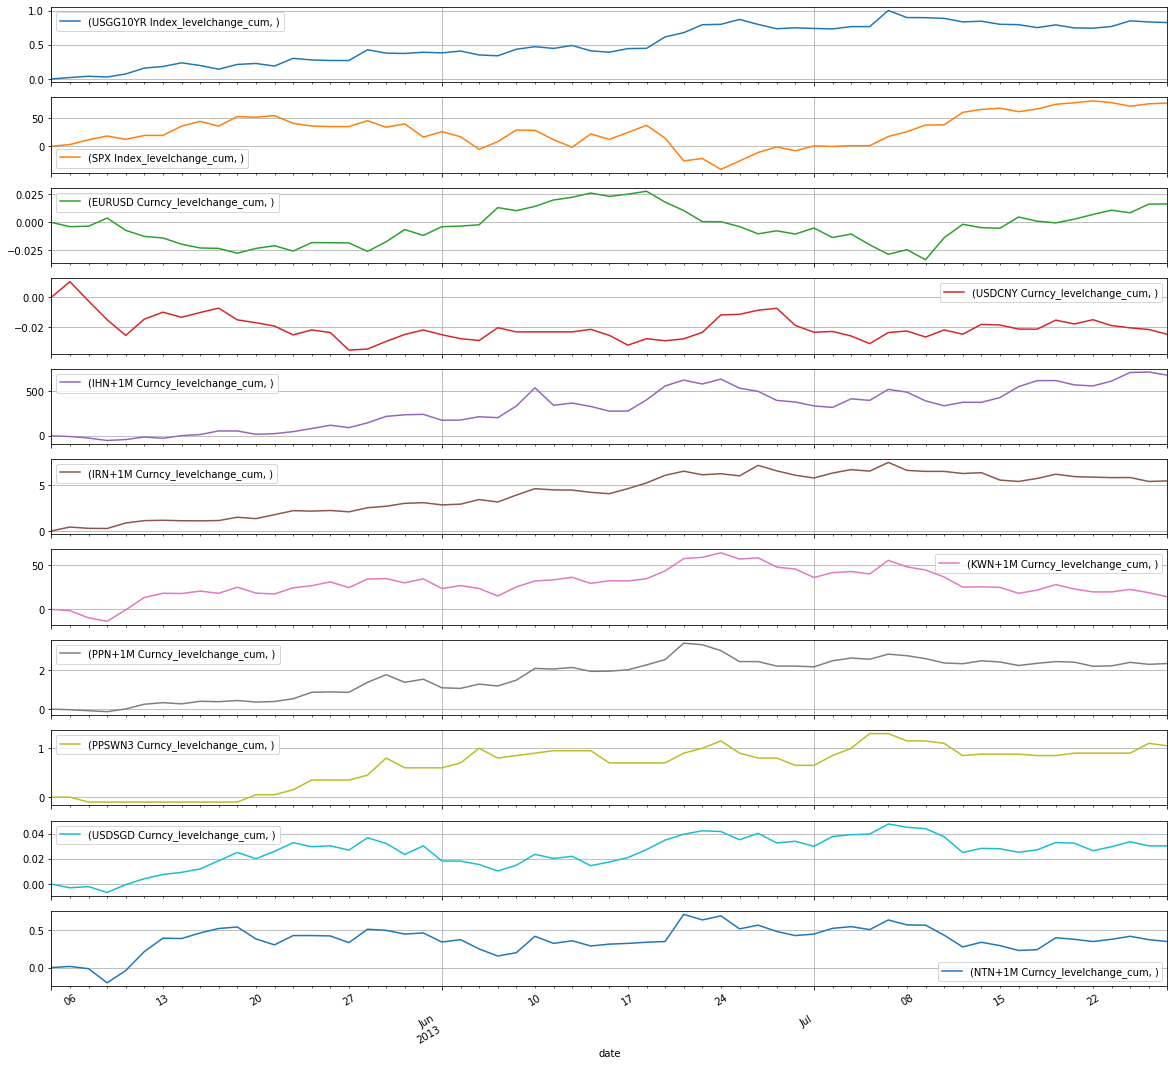

In [46]:
df_ret = df_period.filter(regex = 'change')
df_ret.iloc[0,:] = 0.0
for col in df_ret:
    df_ret[col[0]+'_cum']=df_ret[col].cumsum()
    
df_ret_cleaned = df_ret.filter(regex = 'cum')
df_ret_cleaned.plot(subplots =  True, grid = True, figsize =(20,20))#style = 'b'

In [49]:
df_period.columns  = df_period.columns.get_level_values(0)
df_period.columns

Index(['USGG10YR Index', 'SPX Index', 'EURUSD Curncy', 'USDCNY Curncy',
       'IHN+1M Curncy', 'IRN+1M Curncy', 'KWN+1M Curncy', 'PPN+1M Curncy',
       'PPSWN3 Curncy', 'USDSGD Curncy', 'NTN+1M Curncy',
       'USGG10YR Index_levelchange', 'SPX Index_levelchange',
       'EURUSD Curncy_levelchange', 'USDCNY Curncy_levelchange',
       'IHN+1M Curncy_levelchange', 'IRN+1M Curncy_levelchange',
       'KWN+1M Curncy_levelchange', 'PPN+1M Curncy_levelchange',
       'PPSWN3 Curncy_levelchange', 'USDSGD Curncy_levelchange',
       'NTN+1M Curncy_levelchange'],
      dtype='object')

In [40]:
filtered = df_sars[df_sars['SPX Index_%change'] < -0.02]
filtered.tail()

,USGG10YR Index,SPX Index,EURUSD Curncy,USDCNY Curncy,IHN+1M Curncy,IRN+1M Curncy,KWN+1M Curncy,PPN+1M Curncy,USDSGD Curncy,NTN+1M Curncy,USGG10YR Index_%change,SPX Index_%change,EURUSD Curncy_%change,USDCNY Curncy_%change,IHN+1M Curncy_%change,IRN+1M Curncy_%change,KWN+1M Curncy_%change,PPN+1M Curncy_%change,USDSGD Curncy_%change,NTN+1M Curncy_%change
date,,,,,,,,,,,,,,,,,,,,
2020-09-03,0.6347,3455.06,1.1852,6.8488,14855.0,73.65,1191.80,48.72,1.3646,29.295,-0.020071,-0.035126,-0.000253,0.001521,-0.003154,0.002450,0.001824,0.001439,0.001541,-0.000341
2020-09-08,0.6788,3331.84,1.1777,6.8458,14923.0,74.08,1190.23,48.72,1.3708,29.153,-0.054596,-0.027756,-0.003385,0.002240,0.007562,0.005292,0.002029,0.000205,0.003367,-0.003487
2020-09-23,0.6724,3236.92,1.1660,6.8091,14963.0,74.02,1170.78,48.69,1.3723,29.036,0.002385,-0.023721,-0.004100,0.004292,0.008220,0.003525,0.006084,0.002677,0.005127,0.007041
2020-10-28,0.7710,3271.03,1.1746,6.7290,14823.0,74.45,1135.50,48.46,1.3653,28.393,0.004429,-0.035288,-0.004239,0.003505,0.006929,0.005809,0.005535,0.001861,0.003454,0.001693
2021-01-27,1.0161,3750.77,1.2111,6.4836,14194.0,73.32,1108.46,48.16,1.3290,27.938,-0.017976,-0.025678,-0.004030,0.002846,0.003180,0.002187,0.005670,0.001247,0.003246,0.000537


In [41]:
filtered.to_csv('filtered.csv')

IF NO BBG LINK

,USDCNY Curncy,IHN+1M Curncy,IRN+1M Curncy,KWN+1M Curncy,PPN+1M Curncy,USDSGD Curncy,NTN+1M Curncy,USDCNY Curncy_%change,IHN+1M Curncy_%change,IRN+1M Curncy_%change,KWN+1M Curncy_%change,PPN+1M Curncy_%change,USDSGD Curncy_%change,NTN+1M Curncy_%change
2000-02-25,8.2786,NaN,43.74,1137.5,41.05,1.7087,30.814,0.000072,NaN,0.000229,-0.006333,-0.001945,-0.004254,0.001267
2000-02-28,8.2786,NaN,43.74,1134.5,41.18,1.7185,30.675,0.000000,NaN,0.000000,-0.002637,0.003167,0.005735,-0.004511
2000-02-29,8.2786,NaN,43.74,1131.0,41.16,1.7235,30.734,0.000000,NaN,0.000000,-0.003085,-0.000486,0.002910,0.001923
2000-03-01,8.2786,NaN,43.77,1128.5,41.20,1.7158,30.741,0.000000,NaN,0.000686,-0.002210,0.000972,-0.004468,0.000228
2000-03-02,8.2787,NaN,43.76,1120.0,41.08,1.7215,30.677,0.000012,NaN,-0.000228,-0.007532,-0.002913,0.003322,-0.002082


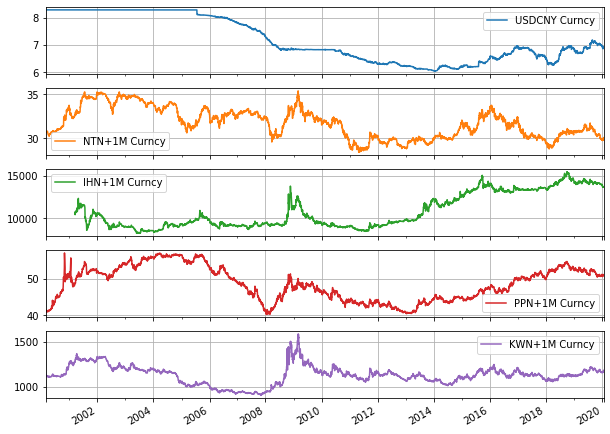

In [97]:
df_asia_dailies.to_csv('sars.csv')
df_asia_dailies = pd.read_csv('sars.csv', index_col = 'Unnamed: 0')#C:\sars.csv')
df_asia_dailies = df_asia_dailies.iloc[2:]

df_asia_dailies.index = pd.to_datetime(df_asia_dailies.index) 
df_asia_dailies = df_asia_dailies.apply(pd.to_numeric, errors = 'coerce')
df_asia_dailies = df_asia_dailies.fillna(method = 'ffill')
df_asia_dailies[['USDCNY Curncy','NTN+1M Curncy', 'IHN+1M Curncy','PPN+1M Curncy','KWN+1M Curncy']].plot(subplots =  True, grid = True, figsize =(10,8))#style = 'b',
df_asia_dailies.head()

In [48]:
(df_asia_dailies.columns)

Index(['USDCNY Curncy', 'IHN+1M Curncy', 'IRN+1M Curncy', 'KWN+1M Curncy',
       'PPN+1M Curncy', 'USDSGD Curncy', 'NTN+1M Curncy',
       'USDCNY Curncy_%change', 'IHN+1M Curncy_%change',
       'IRN+1M Curncy_%change', 'KWN+1M Curncy_%change',
       'PPN+1M Curncy_%change', 'USDSGD Curncy_%change',
       'NTN+1M Curncy_%change'],
      dtype='object')

In [60]:
df_asia_stats = df_sars.iloc[:, 7:]
df_asia_stats.columns
df_asia_stats.tail()

,USDCNY Curncy_%change,IHN+1M Curncy_%change,IRN+1M Curncy_%change,KWN+1M Curncy_%change,PPN+1M Curncy_%change,USDSGD Curncy_%change,NTN+1M Curncy_%change
,,,,,,,
date,,,,,,,
2020-02-10,-0.002585,-0.002828,-0.002650,-0.003616,-0.002157,0.000000,-0.003351
2020-02-11,-0.002620,-0.002618,-0.000140,-0.004892,-0.005895,-0.002231,-0.002530
2020-02-12,0.000861,-0.000875,-0.000420,-0.002302,0.000395,0.000072,-0.001335
2020-02-13,0.000746,0.002919,0.000420,0.004300,-0.001778,0.002092,0.000735
2020-02-14,0.001018,-0.000291,0.001119,-0.001529,0.000396,0.000504,-0.000334


### START ANALYSIS

Index(['USGG10YR Index', 'SPX Index', 'EURUSD Curncy', 'USDCNY Curncy',
       'IHN+1M Curncy', 'IRN+1M Curncy', 'KWN+1M Curncy', 'PPN+1M Curncy',
       'PPSWN3 Curncy', 'USDSGD Curncy', 'NTN+1M Curncy',
       'USGG10YR Index_%change', 'SPX Index_%change', 'EURUSD Curncy_%change',
       'USDCNY Curncy_%change', 'IHN+1M Curncy_%change',
       'IRN+1M Curncy_%change', 'KWN+1M Curncy_%change',
       'PPN+1M Curncy_%change', 'PPSWN3 Curncy_%change',
       'USDSGD Curncy_%change', 'NTN+1M Curncy_%change'],
      dtype='object')
USGG10YR Index
min is 1.7382  and max is 2.6082
%period change is: 43.004257277643546
start is 1.7382  and end is is 2.4857
SPX Index
min is 1573.09  and max is 1669.16
%period change is: -0.5042058448235354
start is 1614.42  and end is is 1606.28
EURUSD Curncy
min is 1.2839  and max is 1.3392
%period change is: -0.7930456001219999
start is 1.3114  and end is is 1.301
USDCNY Curncy
min is 6.1211  and max is 6.1666
%period change is: -0.3037588122543067
start is

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A57B539A0>,
      dtype=object)

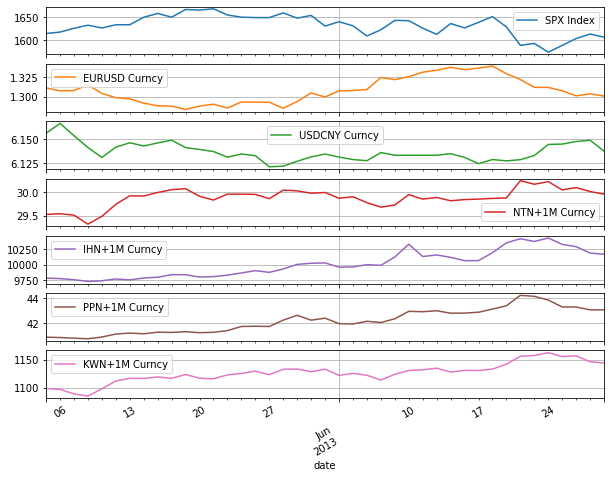

In [8]:
df_SARS1 = df_sars#.loc['2003-02-25':'2003-04-04'] #, 'USDCNY Curncy_%change':]
print(df_SARS1.columns)
for col in df_SARS1.iloc[:,0:6]:
    print(col)
    print('min is '+str(df_SARS1[col].min()),' and max is '+str(df_SARS1[col].max()))
    
    print('%period change is: '+str((df_SARS1[col].iloc[-1]/df_SARS1[col].iloc[0] -1)*100))
    
    print('start is '+str(df_SARS1[col].iloc[0]), ' and end is is '+str(df_SARS1[col].iloc[-1]))
    
df_SARS1[['SPX Index','EURUSD Curncy','USDCNY Curncy','NTN+1M Curncy', 'IHN+1M Curncy',\
          'PPN+1M Curncy', 'KWN+1M Curncy']].plot(subplots = True, grid = True, figsize = (10,8))

In [53]:
# Example of the Student's t-test
from scipy.stats import ttest_ind, ttest_rel

In [57]:
for col in df_asia_stats:
    print(col)
    data1 = df_asia_stats[col]
    data2 = df_sars[col]

    stat, p = ttest_ind(data1, data2, equal_var = False) #ttest_rel(data1, data2) 

    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.1:
        print('Probably the same distribution')
    else:
        print('Probably different distributions')

('USDCNY Curncy_%change', '')
stat=nan, p=nan
Probably different distributions
('IHN+1M Curncy_%change', '')
stat=nan, p=nan
Probably different distributions
('IRN+1M Curncy_%change', '')
stat=nan, p=nan
Probably different distributions
('KWN+1M Curncy_%change', '')
stat=nan, p=nan
Probably different distributions
('PPN+1M Curncy_%change', '')
stat=nan, p=nan
Probably different distributions
('USDSGD Curncy_%change', '')
stat=nan, p=nan
Probably different distributions
('NTN+1M Curncy_%change', '')
stat=nan, p=nan
Probably different distributions


C:\Users\cp85vc.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\cp85vc.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\cp85vc.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [62]:
for col in df_asia_stats:
    print(col)
    print(df_sars[col].min(), df_sars[col].max())

('USDCNY Curncy_%change', '')
-0.020117199299220845 0.01856772468879342
('IHN+1M Curncy_%change', '')
-0.09143968871595332 0.11627906976744184
('IRN+1M Curncy_%change', '')
-0.03966176766659957 0.030404889228418552
('KWN+1M Curncy_%change', '')
-0.06969147005444642 0.10126582278481022
('PPN+1M Curncy_%change', '')
-0.11051212938005384 0.07547169811320753
('USDSGD Curncy_%change', '')
-0.023530337609191765 0.02706134433775098
('NTN+1M Curncy_%change', '')
-0.02514512498519139 0.022635894513565624


In [47]:
df_asia_dailies['KWN+1M Curncy_%change'].describe()

count    5223.000000
mean        0.000031
std         0.006625
min        -0.069691
25%        -0.002816
50%        -0.000039
75%         0.002670
max         0.101266
Name: KWN+1M Curncy_%change, dtype: float64

In [49]:
df_asia_dailies['KWN+1M Curncy_%change'].loc['2003-02-25':'2003-04-04'].describe()

count    29.000000
mean      0.001868
std       0.005401
min      -0.008652
25%      -0.000960
50%       0.001909
75%       0.005016
max       0.015963
Name: KWN+1M Curncy_%change, dtype: float64

In [54]:
df_asia_dailies['PPN+1M Curncy_%change'].loc['2003-02-25':'2003-04-04'].describe()

count    29.000000
mean     -0.000680
std       0.004726
min      -0.012790
25%      -0.003161
50%      -0.000364
75%       0.001822
max       0.008880
Name: PPN+1M Curncy_%change, dtype: float64

In [55]:
df_asia_dailies['PPN+1M Curncy'].loc['2003-02-25':'2003-04-04'].describe()

,PX_LAST
count,29.000000
mean,54.846897
std,0.707769
min,53.550000
25%,54.050000
50%,54.980000
75%,55.400000
max,55.980000


In [50]:
df_asia_dailies['KWN+1M Curncy'].loc['2003-02-25':'2003-04-04'].describe()

,PX_LAST
count,29.000000
mean,1235.605172
std,25.958818
min,1187.900000
25%,1213.350000
50%,1248.500000
75%,1256.800000
max,1261.050000


In [63]:
start = dt.datetime(2000, 1, 20)  #year, month, day
end = dt.datetime.today()
frequency = 'DAILY'

asia_ccys = ['USDCNH Curncy', 'IHN+1M Curncy', 'IRN+1M Curncy', 'KWN+1M Curncy', \
             'PPN+1M Curncy',\
             'USDSGD Curncy', 'NTN+1M Curncy', \
             'USDCNHV3M Curncy', 'USDCNHV1Y Curncy',\
            'USDPHPV3M Curncy', 'USDPHPV1Y Curncy',\
            'USDIDRV3M Curncy', 'USDIDRV1Y Curncy']

df_asia = get_time_series(start = start, end = end, freq = frequency, securities = asia_ccys)

2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010
2020-02-14 17:50:22.593010


In [65]:
df_asia.to_csv('df_asia.csv')

In [42]:
start = dt.datetime(2010, 8, 23) #CNH birth 
end = dt.datetime.today()
frequency = 'DAILY'

cnh_obj = DownloadData_v2.DownloadData(pair = 'USDCNH Curncy', fields = ['PX_LAST'], startDate = start, \
                                       endDate = end, period = frequency, source = 'blp')

cnh = cnh_obj.get_data_blp_historical(1)
cnh.head()

2021-08-15 11:11:55.105327


,PX_LAST
date,
2010-08-23,6.7250
2010-08-24,6.7265
2010-08-25,6.7325
2010-08-26,6.7450
2010-08-27,6.7530


C:\Users\miste\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\miste\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,PX_LAST,rets,minmax_cumret_period,minmax_id,date_minmax,minmax_level,rollingsum_60
date,,,,,,,
2010-08-23,6.7250,0.000000,0.0,0.0,2010-08-23,0.0,NaN
2010-08-24,6.7265,0.000223,0.0,0.0,2010-08-24,0.0,NaN
2010-08-25,6.7325,0.000892,0.0,0.0,2010-08-25,0.0,NaN
2010-08-26,6.7450,0.001855,0.0,0.0,2010-08-26,0.0,NaN
2010-08-27,6.7530,0.001185,0.0,0.0,2010-08-27,0.0,NaN
2010-08-30,6.7650,0.001775,0.0,0.0,2010-08-30,0.0,NaN
2010-08-31,6.7750,0.001477,0.0,0.0,2010-08-31,0.0,NaN
2010-09-01,6.7850,0.001475,0.0,0.0,2010-09-01,0.0,NaN
2010-09-02,6.7805,-0.000663,0.0,0.0,2010-09-02,0.0,NaN


In [12]:
def cum_ret_minmax(obs, target_range, minmax_flag):
    
    '''fcn helper backtesting historical likelyhood of returns moving more than x.  
    given a target_range of daily rets, create array of cumrets of len(obs),
    then return tuple with 0:  min/max of cumrets, 1: index where it takes place '''
    
    cumsum = [0]*obs #init array holder
    #dont think need max_ = 0.0  #init
    i = 0
    #first cumret is the first return ...then you store it and add the others 
    cumsum[0] = target_range[0] 
    for i in range(1, obs):
        #first i need cum sum starting here then i will take the max of the period
        cumsum[i] = target_range[i]+cumsum[i-1]  
    if minmax_flag == 'min':
        minmax = min(cumsum)
    else:
        minmax = max(cumsum)
   
    return (minmax, cumsum.index(minmax))

C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\miste\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipyker

,PX_LAST,rets,minmax_cumret_period,minmax_id,date_minmax,minmax_level,rollingsum_60
date,,,,,,,
2010-08-23,6.7250,0.000000,0.004155,4.0,2010-08-27,6.7530,NaN
2010-08-24,6.7265,0.000223,0.005930,4.0,2010-08-30,6.7265,NaN
2010-08-25,6.7325,0.000892,0.007184,4.0,2010-08-31,6.7325,NaN
2010-08-26,6.7450,0.001855,0.007768,4.0,2010-09-01,6.7450,NaN
2010-08-27,6.7530,0.001185,0.005913,3.0,2010-09-01,6.7530,NaN


C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\miste\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,PX_LAST,rets,minmax_cumret_period,minmax_id,date_minmax,minmax_level,rollingsum_60
date,,,,,,,
2010-08-23,6.7250,0.000000,0.004155,4.0,2010-08-27,6.753,NaN
2010-08-24,6.7265,0.000223,0.005930,4.0,2010-08-30,6.765,NaN
2010-08-25,6.7325,0.000892,0.007184,4.0,2010-08-31,6.775,NaN


In [112]:
cnh['rets'] = np.log(cnh['PX_LAST']/cnh['PX_LAST'].shift(1))
cnh['minmax_cumret_period'] = 0.0
cnh['minmax_id'] = 0.0
cnh['rets'].iloc[0] = 0.0
cnh['date_minmax'] = cnh.index
cnh['minmax_level'] = 0.0
#cnh['cumsum'] = cnh['rets'].cumsum()
dayroll = 60 
cnh['rollingsum_'+str(dayroll)] = cnh['rets'].rolling(window = dayroll, min_periods = dayroll).sum()

#cnh.drop(['rollingsum3', 'rollingsum_3'], axis = 1, inplace = True)
#cnh['max_cum_ret_period'] = 0.0
#cnh['max_cum_ret_period'] = cnh.apply(lambda x: cum_ret_max(5, x['rets']), axis = 1)
obs = 60#len(cnh)

for i in range(0,len(cnh)-obs):
 
    cnh['minmax_cumret_period'][i] = cum_ret_minmax(obs, cnh['rets'][i:i+obs], 'max')[0]
    cnh['minmax_id'][i] = cum_ret_minmax(obs, cnh['rets'][i:i+obs], 'max')[1]
    cnh['date_minmax'][i] = cnh.index[i+int(cnh['minmax_id'][i])]
    cnh['minmax_level'][i] = cnh['PX_LAST'].loc[cnh['date_minmax'][i]]

    #print(cum_ret_minmax(5, cnh['rets']))

cnh.head(10)

C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A valu

,PX_LAST,rets,minmax_cumret_period,minmax_id,date_minmax,minmax_level,rollingsum_60
date,,,,,,,
2010-08-23,6.7250,0.000000,0.008882,7.0,2010-09-01,6.7850,NaN
2010-08-24,6.7265,0.000223,0.008882,6.0,2010-09-01,6.7850,NaN
2010-08-25,6.7325,0.000892,0.008659,5.0,2010-09-01,6.7850,NaN
2010-08-26,6.7450,0.001855,0.007768,4.0,2010-09-01,6.7850,NaN
2010-08-27,6.7530,0.001185,0.005913,3.0,2010-09-01,6.7850,NaN
2010-08-30,6.7650,0.001775,0.004727,2.0,2010-09-01,6.7850,NaN
2010-08-31,6.7750,0.001477,0.002952,1.0,2010-09-01,6.7850,NaN
2010-09-01,6.7850,0.001475,0.001475,0.0,2010-09-01,6.7850,NaN
2010-09-02,6.7805,-0.000663,-0.000663,0.0,2010-09-02,6.7805,NaN


In [115]:
cnh_sort = cnh
cnh_sort.sort_values(by = ['minmax_cumret_period'], ascending = False, inplace = True)
cnh_sort.to_csv('cnh_max_ret.csv')#.loc['2019-04-20':'2019-08-31']#

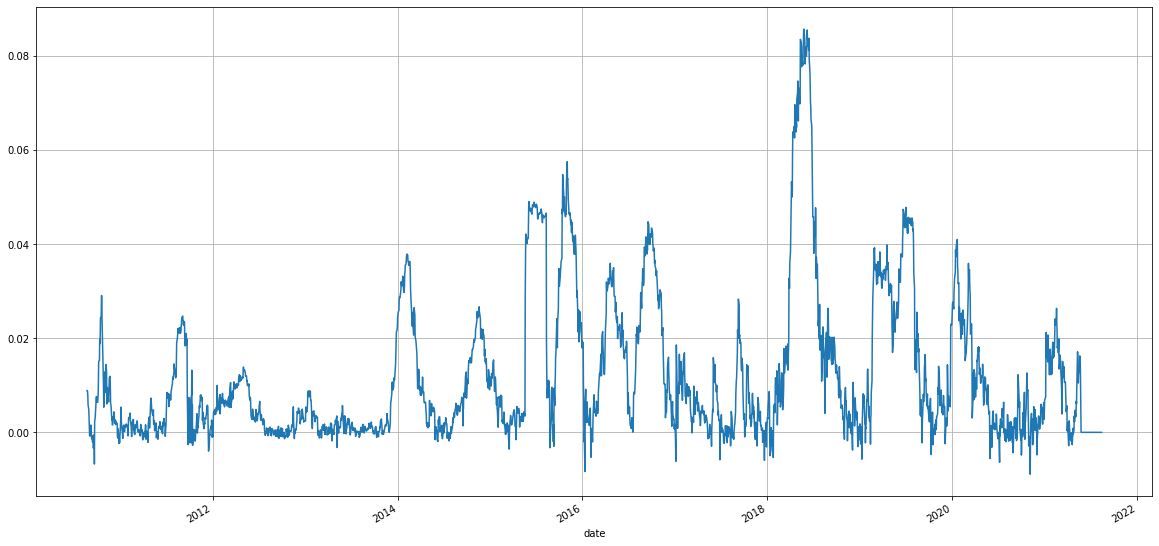

In [41]:
cnh['max_cum_ret_period'].plot(grid = True, figsize= (20, 10))

In [72]:
spot = 6.47
K = 7.25
dist = K/spot -1
dist #12%   ........so how many windows of 3months had amplitude of > 12%
days = 90

#call function, rank the 

0.1205564142194746

## scrap paper

In [117]:
toy = cnh.iloc[0:20]
toy.loc[:, 'rets']  = np.log(toy['PX_LAST']/toy['PX_LAST'].shift(1))
toy.loc[:,'minmax_cumret_period'] = 0.0
toy.loc[:,'minmax_id'] = 0.0
toy['rets'].iloc[0] = 0.0
toy.loc[:,'date_minmax'] = toy.index
toy.loc[:,'minmax_level'] = 0.0
toy.head(8)


C:\Users\miste\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\miste\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\miste\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,PX_LAST,rets,minmax_cumret_period,minmax_id,date_minmax,minmax_level,rollingsum_60
date,,,,,,,
2018-05-25,6.3886,0.000000,0.0,0.0,2018-05-25,0.0,0.007526
2018-06-07,6.3896,0.000157,0.0,0.0,2018-06-07,0.0,0.009450
2018-05-24,6.3764,-0.002068,0.0,0.0,2018-05-24,0.0,0.004543
2018-05-28,6.3970,0.003225,0.0,0.0,2018-05-28,0.0,0.009755
2018-06-14,6.4174,0.003184,0.0,0.0,2018-06-14,0.0,0.012213
2018-06-08,6.3993,-0.002824,0.0,0.0,2018-06-08,0.0,0.011457
2018-05-11,6.3334,-0.010351,0.0,0.0,2018-05-11,0.0,0.005494
2018-05-14,6.3369,0.000552,0.0,0.0,2018-05-14,0.0,0.004983


In [ ]:

#toy['date_minmax'][0]   is Timestamp('2010-08-23 00:00:00')but i wnat itt obe Aug26
toy['date_minmax'][0] = toy.index[int(toy['minmax_id'][0])]
toy['minmax_level'][0] = toy['PX_LAST'].loc[toy['date_minmax'][0]]
#print(toy['PX_LAST'].index[toy['date_minmax'][0]])
toy.head()
#toy['minmax_id'][0]

j = 0
days = 5
for j in range(0, len(toy)-days):
    toy['minmax_cumret_period'][j] = cum_ret_minmax(days, toy['rets'][j:j+days], 'max')[0]
    toy['minmax_id'][j] = cum_ret_minmax(days, toy['rets'][j:j+days], 'max')[1]
    #if toy['minmax_id'][j] == j:
        #print(toy['minmax_id'], j)
    toy['date_minmax'][j] = toy.index[j+int(toy['minmax_id'][j])]
    toy['minmax_level'][j] = toy['PX_LAST'].loc[toy['date_minmax'][j]]
toy.head(3) 

In [131]:
start = dt.datetime(1980, 8, 23) #CNH birth 
end = dt.datetime.today()
frequency = 'MONTHLY'

m2_obj = DownloadData_v2.DownloadData(pair = ['SPX Index','ECORUSN Index'], fields = ['PX_LAST'], startDate = start, \
                                       endDate = end, period = frequency, source = 'blp')

m2 = m2_obj.get_data_blp_historical(1)
m2.head()

2021-08-15 15:21:32.832778


,PX_LAST,PX_LAST
date,,
1980-08-29,122.38,NaN
1980-09-30,125.46,NaN
1980-10-31,127.47,NaN
1980-11-28,140.52,NaN
1980-12-31,135.76,NaN


In [133]:
m2['monthly_change'] = m2['PX_LAST'].pct_change()
m2['proxy_annualized'] = m2['monthly_change'].rolling(window = 12).sum()#*12
m2.tail(20)

ValueError: Wrong number of items passed 2, placement implies 1

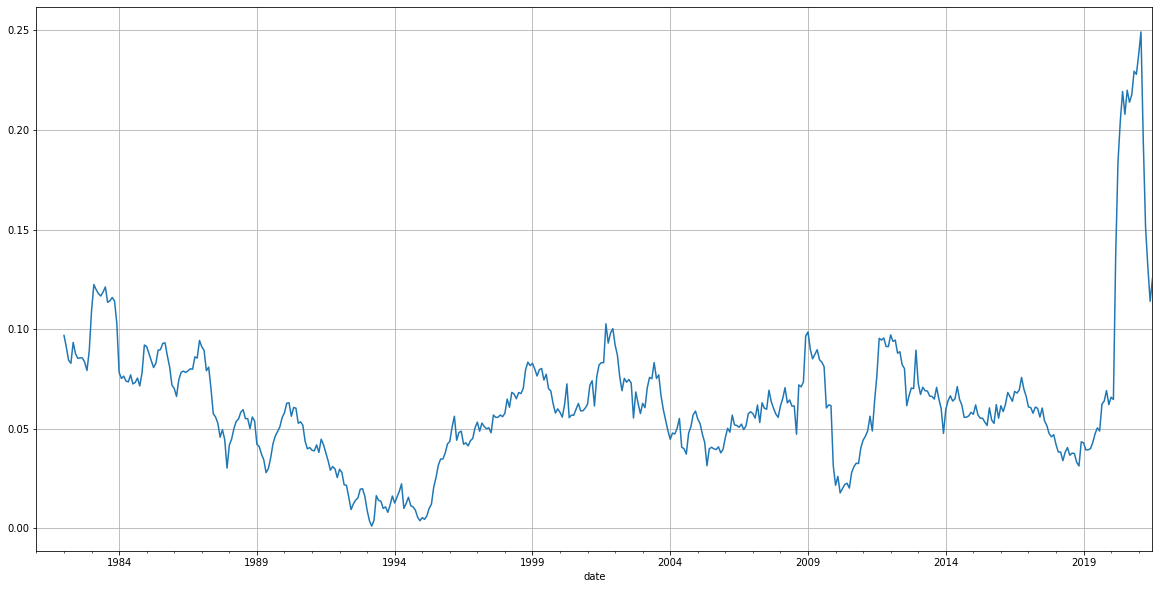

In [130]:
m2['proxy_annualized'].plot(grid = True, figsize = (20,10))